In [7]:
import mysql.connector
import pandas as pd

In [8]:
import mysql.connector as connector

credentials = {
    "username": "root",
    "password": ""
}

# Establish a connection with the DBMS
conn = connector.connect(user=credentials["username"],
                         passwd=credentials["password"],
                         host="localhost",
                         database="city_lines")
cursor = conn.cursor(buffered=True)
sql_queries = []

In [9]:
sql_queries.append("USE city_lines;")
sql_queries.append("SET GLOBAL max_allowed_packet=67108864;")

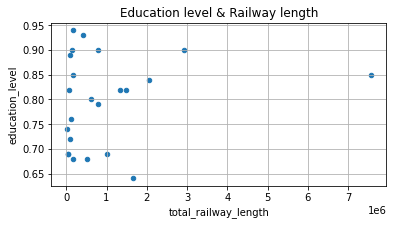

In [10]:
#Q1: Is the education level of a country related to its total railway length?

sql_query = """
SELECT cities.country,
       SUM(length) AS total_railway_length, 
       education_index AS education_level
  FROM tracks
       LEFT JOIN cities ON cities.id = tracks.city_id
       LEFT JOIN education_levels ON education_levels.country = cities.country
 GROUP BY cities.country 
 ORDER BY education_index DESC;
"""

result = pd.read_sql(sql_query, conn)

my_style=['-.']

plot = result.plot.scatter(title="Education level & Railway length", figsize=(6,3), x='total_railway_length',y='education_level', use_index=True,grid=True,legend=True,style=my_style);


In [11]:
#Q1: Is the education level of a country related to its total railway length?

result.corr (method = "pearson")

,total_railway_length,education_level
total_railway_length,1.000000,0.172839
education_level,0.172839,1.000000


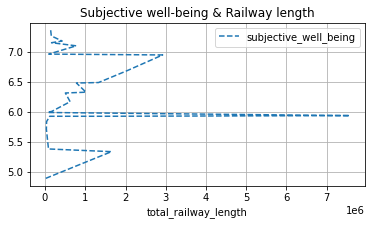

In [12]:
#Q2: Is the subjective well-being of a country related to its total railway length?

sql_query = """
SELECT cities.country,
       SUM(length) AS total_railway_length, 
       ladder_score AS subjective_well_being
  FROM tracks
       LEFT JOIN cities ON cities.id = tracks.city_id
       LEFT JOIN world_happiness_report ON world_happiness_report.country = cities.country
 GROUP BY cities.country 
 ORDER BY ladder_score DESC;
"""

result = pd.read_sql(sql_query, conn)

my_style=['--']

plot = result.plot.line(title="Subjective well-being & Railway length", figsize=(6,3), x='total_railway_length',y='subjective_well_being', use_index=True,grid=True,legend=True,style=my_style);

In [13]:
#Q2: Is the subjective well-being of a country related to its total railway length?

result.corr (method = "pearson")

,total_railway_length,subjective_well_being
total_railway_length,1.000000,-0.043868
subjective_well_being,-0.043868,1.000000


In [14]:
#Q2: Is the subjective well-being of a country related to its total railway length?

result.corr (method = "spearman")

,total_railway_length,subjective_well_being
total_railway_length,1.000000,0.225352
subjective_well_being,0.225352,1.000000


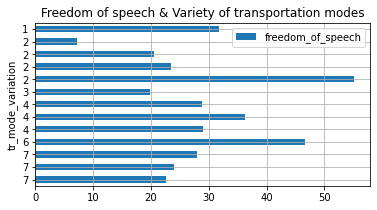

In [15]:
#Q4: Are freedom of speech rankings related to the variety of transportation modes in a country?

sql_query = """
SELECT cities.country,
       COUNT(DISTINCT(`lines`.transport_mode_id)) AS tr_mode_variation, 
       index_score AS freedom_of_speech
  FROM cities
       JOIN freedom_of_speech ON (cities.country = freedom_of_speech.country)
       JOIN `lines` ON (cities.id = `lines`.city_id)
       JOIN transport_modes on (`lines`.transport_mode_id = transport_modes.id )
 WHERE transport_modes.id != 0
 GROUP BY cities.country
 ORDER BY tr_mode_variation DESC;
"""

result = pd.read_sql(sql_query, conn)

plot = result.plot.barh(title="Freedom of speech & Variety of transportation modes", figsize=(6,3), x='tr_mode_variation',y='freedom_of_speech', use_index=True,grid=True,legend=True);

In [16]:
#Q4: Are freedom of speech rankings related to the variety of transportation modes in a country?

result.corr (method = "pearson")

,tr_mode_variation,freedom_of_speech
tr_mode_variation,1.000000,0.055661
freedom_of_speech,0.055661,1.000000


In [17]:
#Q4: Are freedom of speech rankings related to the variety of transportation modes in a country?

result.corr (method = "spearman")

,tr_mode_variation,freedom_of_speech
tr_mode_variation,1.000000,0.056356
freedom_of_speech,0.056356,1.000000


In [18]:
#Q6: Are there any “late bloomer” cities? 
#Cities that started building up their metro system late but have quickly built up many lines and stations.

sql_query = """
SELECT cities.name AS city,
       MIN(buildstart) AS min_buildstart, 
       SUM(length) AS sum_length
  FROM tracks
       LEFT JOIN cities ON (cities.id = tracks.city_id)
 WHERE buildstart > 0
 GROUP BY cities.name
 ORDER BY min_buildstart DESC, sum_length ASC;
"""

result = pd.read_sql(sql_query, conn)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

result

#Seçtiğim late bloomer'lar
#Winnipeg - buildstart: 2013 - length: 203519.0
#La Paz	 - buildstart: 2013 - length: 31179.0
#Dijon - buildstart: 2010 - length: 38110.0
#Angers - buildstart: 2007 - length: 33944.0
#Bordeaux - buildstart: 2000 - length: 43302.0

,city,min_buildstart,sum_length
0,La Paz,2013,31179.0
1,Winnipeg,2013,203519.0
2,San Sebastián,2012,690.0
3,Zaragoza,2010,12026.0
4,Le Havre,2010,25978.0
5,Rio de Janeiro,2010,28982.0
6,Tours,2010,29755.0
7,Dijon,2010,38110.0
8,Brest,2009,28677.0
9,Reims,2008,11337.0


In [19]:
#Q7: What are the most “crowded” (short line, lots of stations) and the most “spacious” 
#(long line, barely no stations) lines?

sql_query = """
SELECT y.* FROM 
(
    SELECT x.city_name, x.line_name, x.line_length, x.number_of_stations, IFNULL (x.number_of_stations, 0) / x.line_length AS density
    FROM
    (
        SELECT b.name AS city_name, c.name AS line_name, e.length AS line_length, COUNT(d.id) AS number_of_stations
        FROM
        station_lines a,
        cities b,
        `lines` c,
        stations d,
        tracks e
            WHERE a.city_id = b.id
            AND a.line_id = c.id
            AND a.station_id = d.id
            AND a.line_id = e.id
            GROUP BY b.name, c.name, e.length
            )x
                WHERE x.line_length IS NOT NULL
                )y
                    ORDER BY density DESC;
"""
result = pd.read_sql(sql_query, conn)
result

#Most crowded:
#Piccadilly Line (London) - line length: 74 - no of stations: 51 - density: 0.6892
#Noda/Urban Park Line (Tokyo) - line length: 152 - no of stations: 35 - density: 0.2303
#3rd Avenue line (New York) - line length: 294 - no of stations: 53 - density: 0.1803
#Red Line (Boston) - line length: 128 - no of stations: 22 - density: 0.1719
#Hachiko Line (Tokyo) - line length: 163 - no of stations: 23 - density: 0.1411

#Most spacious
#J (Paris) - line length: 21768 - no of stations: 1 - density: 0
#2 Fourvière (Lyons) - line length: 58532 - no of stations: 51 - density: 0
#U7 (Berlin) - line length: 35655 - no of stations: 51 - density: 0
#U2 (Berlin) - line length: 38437 - no of stations: 51 - density: 0
#Tomisaka Line (Tokyo) - line length: 32555 - no of stations: 51 - density: 0.0001

,city_name,line_name,line_length,number_of_stations,density
0,London,Piccadilly Line,74,51,0.6892
1,Tokyo,Noda / Urban Park Line,152,35,0.2303
2,New York,3rd Avenue Line,294,53,0.1803
3,Boston,Red Line,128,22,0.1719
4,Tokyo,Hachiko Line,163,23,0.1411
...,...,...,...,...,...
867,Tokyo,Tomisaka Line,32555,4,0.0001
868,Berlin,U2,38437,1,0.0000
869,Berlin,U7,35655,1,0.0000
870,Lyons,2 Fourvière,58532,2,0.0000
